# Loading Dataset 

In [ ]:
# mount drive first

!cp /content/drive/My\ Drive/RWF-2000/RWF-2000.zip.001 . 
!cp /content/drive/My\ Drive/RWF-2000/RWF-2000.zip.002 . 
!cp /content/drive/My\ Drive/RWF-2000/RWF-2000.zip.003 . 



In [ ]:
!cat /content/RWF-2000.zip.* > RWF-2000.zip


In [ ]:
!unzip RWF-2000.zip

In [ ]:

!ls "/content/RWF-2000/train/Fight" | wc -l
!ls "/content/RWF-2000/train/NonFight" | wc -l


!ls "/content/RWF-2000/val/Fight" | wc -l
!ls "/content/RWF-2000/val/NonFight" | wc -l

800
800
200
200


# Creating Mini Dataset

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os 
from tqdm import tqdm

In [ ]:
def Video2Npy(file_path):
      # Load video
      cap = cv2.VideoCapture(file_path)
      # Get number of frames
      len_frames = int(cap.get(7))
      # final frame
      frames = [x * 9 for x in range(16)]
      # Extract frames from video

      extracted_frames = []

      for i in range(16):
          # extract specific frame out of video
          cap.set(cv2.CAP_PROP_POS_FRAMES, frames[i])
          return_value, frame = cap.read()
          if return_value:
            frame = cv2.resize(frame, (112, 112))
            extracted_frames.append(frame)
      cap.release()
      return np.array(extracted_frames)

In [ ]:
def Save2Npy(file_dir, save_dir, train, test):

    if not os.path.exists(save_dir):
        os.makedirs(save_dir)
    # List the files
    videos = os.listdir(file_dir)
    n = 0
    t = train / 2
    if 'train' in file_dir:
      t = train / 2
    elif 'val' in file_dir:
      t = test / 2
    for v in tqdm(videos):
        # Split video name
        video_name = v.split('.')[0]
        # Get src 
        video_path = os.path.join(file_dir, v)
        # Get dest 
        save_path = os.path.join(save_dir, video_name+'.npy') 
        # Load and preprocess video
        data = Video2Npy(file_path=video_path)
        data = np.uint8(data)
        # Save as .npy file
        np.save(save_path, data)
        n += 1
        if n == t:
          break

    
    return None

In [ ]:
# make a new folder for mini dataset
!mkdir '/content/new-numpy-RWF-16-2000'


source_path = '/content/RWF-2000'
target_path = '/content/new-numpy-RWF-16-2000'

# copy videos and process them and save them in new folder 
for f1 in ['train', 'val']:
    for f2 in ['Fight', 'NonFight']:
        path1 = os.path.join(source_path, f1, f2)
        path2 = os.path.join(target_path, f1, f2)
        Save2Npy(file_dir=path1, save_dir=path2, train=1600, test=400)

In [ ]:
# !rm -r "/content/new_numpy-RWF-200"

In [ ]:
!ls /content/new-numpy-RWF-16-2000/train/Fight | wc -l
!ls /content/new-numpy-RWF-16-2000/train/NonFight | wc -l

!ls /content/new-numpy-RWF-16-2000/val/Fight | wc -l
!ls /content/new-numpy-RWF-16-2000/val/NonFight | wc -l


800
800
200
200


(16, 112, 112, 3)


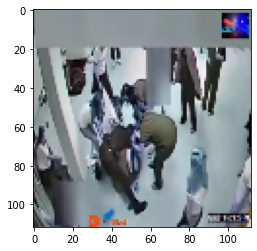

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
data = np.load("/content/new-numpy-RWF-16-2000/train/Fight/0H2s9UJcNJ0_2.npy")

print(data.shape)
plt.imshow(data[9,:,:,:])


In [ ]:
# !zip -r "/content/new-numpy-RWF-16-2000.zip" "/content/new-numpy-RWF-16-2000"

In [ ]:
# upload new_numpy-RWF-200.zip on drive for later use

!cp "/content/new-numpy-RWF-16-2000.zip" "/content/drive/My Drive"

In [ ]:
# mount drive first
# execute only when loading new_numpy-RWF-200.zip from drive

# !cp "/content/drive/My Drive/new-numpy-RWF-16-200.zip" .

In [ ]:
# !unzip /content/new-numpy-RWF-16-200.zip

In [ ]:
!mkdir "all_npy_RWF_2000" .

mkdir: cannot create directory ‘.’: File exists


In [ ]:
from tqdm import tqdm
import os
import numpy as np

def npy2singlefile(file_dir, typ):
    first_file = os.listdir(file_dir)[0]
    first_file_path = os.path.join(file_dir, first_file)
    data = np.load(first_file_path)

    all_npy_videos = os.listdir(file_dir)

    for np_video in tqdm(all_npy_videos):
        if np_video != first_file:  
            video_path = os.path.join(file_dir, np_video)
            new_data = np.load(video_path)
            data = np.concatenate((new_data, data))
            np.save("/content/all_npy_RWF_2000/npy-new_numpy-"+typ+".npy", data)
        else:
          print("\ntrue\n")


In [ ]:
# !cp /content/drive/My\ Drive/new-numpy-RWF-16-200.zip .

# !mkdir /content/new-numpy-RWF-16-200
# !unzip "/content/new-numpy-RWF-16-200.zip" /content/new-numpy-RWF-16-200

In [ ]:
file_dir_train_Fight = "/content/new-numpy-RWF-16-2000/train/Fight"
file_dir_train_NonFight = "/content/new-numpy-RWF-16-2000/train/NonFight"
file_dir_val_Fight = "/content/new-numpy-RWF-16-2000/val/Fight"
file_dir_val_NonFight = "/content/new-numpy-RWF-16-2000/val/NonFight"

npy2singlefile(file_dir_train_Fight, "train_Fight")
npy2singlefile(file_dir_train_NonFight, "train_NonFight")

npy2singlefile(file_dir_val_Fight, "val_Fight")
npy2singlefile(file_dir_val_NonFight, "val_NonFight")











  0%|          | 0/800 [00:00<?, ?it/s]







  1%|          | 6/800 [00:00<00:20, 39.54it/s]


true



Streaming output truncated to the last 5000 lines.






 22%|██▏       | 177/800 [02:20<22:11,  2.14s/it]







 22%|██▏       | 178/800 [02:22<22:38,  2.18s/it]







 22%|██▏       | 179/800 [02:23<19:04,  1.84s/it]







 22%|██▎       | 180/800 [02:23<15:16,  1.48s/it]







 23%|██▎       | 181/800 [02:25<14:32,  1.41s/it]







 23%|██▎       | 182/800 [02:26<13:38,  1.32s/it]







 23%|██▎       | 183/800 [02:31<24:13,  2.36s/it]







 23%|██▎       | 184/800 [02:31<19:03,  1.86s/it]







 23%|██▎       | 185/800 [02:32<15:37,  1.52s/it]







 23%|██▎       | 186/800 [02:36<21:57,  2.15s/it]







 23%|██▎       | 187/800 [02:36<17:40,  1.73s/it]







 24%|██▎       | 188/800 [02:38<16:12,  1.59s/it]







 24%|██▎       | 189/800 [02:41<22:17,  2.19s/it]







 24%|██▍       | 190/800 [02:42<18:10,  1.79s/it]







 24%|██▍       | 191/800 [02:43<15:33,  1.53s/it]







 24%|██▍       | 192/800 [02:47<23:53,  2.36s/it]







 24%|██▍       | 193/800 [02:49


true



Streaming output truncated to the last 5000 lines.






 22%|██▏       | 178/800 [02:39<17:19,  1.67s/it]







 22%|██▏       | 179/800 [02:40<15:53,  1.54s/it]







 22%|██▎       | 180/800 [02:44<22:22,  2.17s/it]







 23%|██▎       | 181/800 [02:45<17:19,  1.68s/it]







 23%|██▎       | 182/800 [02:45<14:03,  1.37s/it]







 23%|██▎       | 183/800 [02:49<22:38,  2.20s/it]







 23%|██▎       | 184/800 [02:51<21:57,  2.14s/it]







 23%|██▎       | 185/800 [02:53<20:32,  2.00s/it]







 23%|██▎       | 186/800 [02:54<16:48,  1.64s/it]







 23%|██▎       | 187/800 [02:54<13:17,  1.30s/it]







 24%|██▎       | 188/800 [02:59<24:39,  2.42s/it]







 24%|██▎       | 189/800 [03:00<19:35,  1.92s/it]







 24%|██▍       | 190/800 [03:01<14:58,  1.47s/it]







 24%|██▍       | 191/800 [03:06<25:53,  2.55s/it]







 24%|██▍       | 192/800 [03:06<19:08,  1.89s/it]







 24%|██▍       | 193/800 [03:08<19:47,  1.96s/it]







 24%|██▍       | 194/800 [03:10


true











  4%|▍         | 8/200 [00:00<00:07, 26.22it/s]







  5%|▌         | 10/200 [00:00<00:23,  8.18it/s]







  6%|▌         | 11/200 [00:01<00:27,  6.84it/s]







  6%|▌         | 12/200 [00:01<00:25,  7.34it/s]







  7%|▋         | 14/200 [00:01<00:25,  7.29it/s]







  8%|▊         | 15/200 [00:01<00:24,  7.53it/s]







  8%|▊         | 16/200 [00:01<00:27,  6.65it/s]







  8%|▊         | 17/200 [00:02<00:29,  6.15it/s]







  9%|▉         | 18/200 [00:02<00:27,  6.73it/s]







 10%|▉         | 19/200 [00:02<00:29,  6.18it/s]







 10%|█         | 20/200 [00:02<00:36,  4.97it/s]







 10%|█         | 21/200 [00:02<00:37,  4.74it/s]







 12%|█▏        | 24/200 [00:03<00:28,  6.16it/s]







 13%|█▎        | 26/200 [00:03<00:22,  7.77it/s]







 14%|█▍        | 28/200 [00:03<00:18,  9.25it/s]







 15%|█▌        | 30/200 [00:03<00:15, 10.75it/s]







 16%|█▌        | 32/200 [00:03<00:14, 11.98it/s]







 17%|█▋        | 34/200 [00:03<00:12, 13.


true











  2%|▏         | 4/200 [00:00<00:37,  5.16it/s]







  3%|▎         | 6/200 [00:00<00:29,  6.59it/s]







  4%|▎         | 7/200 [00:00<00:26,  7.23it/s]







  4%|▍         | 9/200 [00:01<00:21,  8.86it/s]







  6%|▌         | 11/200 [00:01<00:17, 10.57it/s]







  8%|▊         | 15/200 [00:01<00:13, 13.26it/s]







  9%|▉         | 18/200 [00:01<00:11, 15.71it/s]







 10%|█         | 21/200 [00:01<00:09, 18.15it/s]







 12%|█▏        | 24/200 [00:02<00:15, 11.32it/s]







 13%|█▎        | 26/200 [00:02<00:22,  7.70it/s]







 14%|█▍        | 28/200 [00:02<00:26,  6.50it/s]







 15%|█▌        | 30/200 [00:03<00:34,  4.86it/s]







 16%|█▌        | 31/200 [00:07<03:32,  1.26s/it]







 16%|█▌        | 32/200 [00:07<02:44,  1.02it/s]







 16%|█▋        | 33/200 [00:07<02:09,  1.29it/s]







 17%|█▋        | 34/200 [00:08<01:49,  1.51it/s]







 18%|█▊        | 35/200 [00:08<01:36,  1.72it/s]







 18%|█▊        | 36/200 [00:09<01:27,  1.87i

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

x_train_Fight = np.load('/content/all_npy_RWF_2000/npy-new_numpy-train_Fight.npy')
x_train_NonFight = np.load('/content/all_npy_RWF_2000/npy-new_numpy-train_NonFight.npy')
x_val_Fight = np.load('/content/all_npy_RWF_2000/npy-new_numpy-val_Fight.npy')
x_val_NonFight = np.load('/content/all_npy_RWF_2000/npy-new_numpy-val_NonFight.npy')

print(x_train_Fight.shape)

train = 1600
test = 400

x_train_Fight = np.reshape(x_train_Fight, (train//2, 16, 112, 112, 3))
x_train_NonFight = np.reshape(x_train_NonFight, (train//2, 16, 112, 112, 3))
x_val_Fight = np.reshape(x_val_Fight, (test//2, 16, 112, 112, 3))
x_val_NonFight = np.reshape(x_val_NonFight, (test//2, 16, 112, 112, 3))

(12800, 112, 112, 3)


(800, 16, 112, 112, 3)
(112, 112, 3)


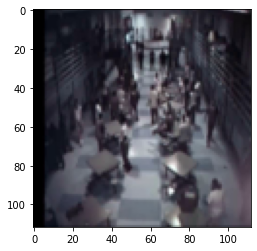

In [ ]:
picData = x_train_NonFight

print(picData.shape)

c = picData[0,0,:,:,:]

plt.imshow(c)

print(c.shape)


(200, 16, 112, 112, 3)
(112, 112, 3)


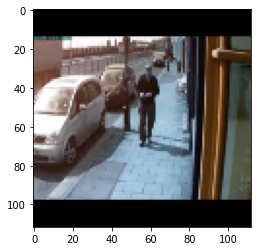

In [ ]:
picData = x_val_NonFight

print(picData.shape)

c = picData[0,0,:,:,:]

plt.imshow(c)

print(c.shape)



In [ ]:
x_train = np.concatenate((x_train_Fight, x_train_NonFight))
x_val = np.concatenate((x_val_Fight, x_val_NonFight))


print(x_train.shape)
print(x_val.shape)

(1600, 16, 112, 112, 3)
(400, 16, 112, 112, 3)


(1600, 16, 112, 112, 3)
(112, 112, 3)


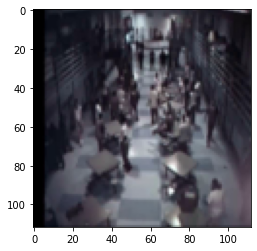

In [ ]:
picData = x_train

print(picData.shape)

c = picData[800,0,:,:,:]

plt.imshow(c)

print(c.shape)

(400, 16, 112, 112, 3)
(112, 112, 3)


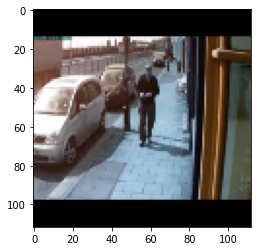

In [ ]:
picData = x_val

print(picData.shape)

c = picData[200,0,:,:,:]

plt.imshow(c)

print(c.shape)

In [ ]:
import numpy as np
from keras.utils import to_categorical

y_train_Fight = np.tile(1,800)
y_train_NonFight = np.tile(0,800)
y_train = np.concatenate((y_train_Fight, y_train_NonFight))

y_train = to_categorical(y_train)

y_val_Fight = np.tile(1,200)
y_val_NonFight = np.tile(0,200)
y_val = np.concatenate((y_val_Fight, y_val_NonFight))

y_val = to_categorical(y_val)

print(y_train.shape)
print(y_val.shape)

(1600, 2)
(400, 2)


In [ ]:
!zip -r /content/all_npy_RWF_2000.zip /content/all_npy_RWF_2000

  adding: content/all_npy_RWF_2000/ (stored 0%)
  adding: content/all_npy_RWF_2000/npy-new_numpy-train_NonFight.npy (deflated 29%)
  adding: content/all_npy_RWF_2000/npy-new_numpy-train_Fight.npy (deflated 30%)
  adding: content/all_npy_RWF_2000/npy-new_numpy-val_NonFight.npy (deflated 28%)
  adding: content/all_npy_RWF_2000/npy-new_numpy-val_Fight.npy (deflated 23%)


In [ ]:
!cp /content/all_npy_RWF_2000.zip /content/drive/My\ Drive

# Loading processed Dataset from drive

In [ ]:
# mount drive first
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# unzip all_npy_RWF-2000.zip
!unzip "/content/drive/My Drive/all_npy_RWF_2000.zip"


Archive:  /content/drive/My Drive/all_npy_RWF_2000.zip
replace content/all_npy_RWF_2000/npy-new_numpy-train_NonFight.npy? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: content/all_npy_RWF_2000/npy-new_numpy-train_NonFight.npy  A
A

  inflating: content/all_npy_RWF_2000/npy-new_numpy-train_Fight.npy  A
A

  inflating: content/all_npy_RWF_2000/npy-new_numpy-val_NonFight.npy  
  inflating: content/all_npy_RWF_2000/npy-new_numpy-val_Fight.npy  A



In [ ]:
import numpy as np

x_train_Fight = np.load("/content/content/all_npy_RWF_2000/npy-new_numpy-train_Fight.npy")
x_train_NonFight = np.load("/content/content/all_npy_RWF_2000/npy-new_numpy-train_NonFight.npy")
x_val_Fight = np.load("/content/content/all_npy_RWF_2000/npy-new_numpy-val_Fight.npy")
x_val_NonFight = np.load("/content/content/all_npy_RWF_2000/npy-new_numpy-val_NonFight.npy")

print(x_train_Fight.shape)

train = 1600
test = 400

x_train_Fight = np.reshape(x_train_Fight, (train//2, 16, 112, 112, 3))
x_train_NonFight = np.reshape(x_train_NonFight, (train//2, 16, 112, 112, 3))
x_val_Fight = np.reshape(x_val_Fight, (test//2, 16, 112, 112, 3))
x_val_NonFight = np.reshape(x_val_NonFight, (test//2, 16, 112, 112, 3))

print(x_train_Fight.shape)


(12800, 112, 112, 3)
(800, 16, 112, 112, 3)


In [ ]:
x_train = np.concatenate((x_train_Fight, x_train_NonFight))
x_val = np.concatenate((x_val_Fight, x_val_NonFight))
x_dataset = np.concatenate((x_train, x_val))

# np array of all Fight npys (size 1000)
x_Fight = np.concatenate((x_train_Fight, x_val_Fight))

# np array of all NonFight npys (size 1000)
x_NonFight = np.concatenate((x_train_NonFight, x_val_NonFight))


print(x_Fight.shape)
print(x_NonFight.shape)
print(x_train.shape)
print(x_val.shape)
print(x_dataset.shape)


(1000, 16, 112, 112, 3)
(1000, 16, 112, 112, 3)
(1600, 16, 112, 112, 3)
(400, 16, 112, 112, 3)
(2000, 16, 112, 112, 3)


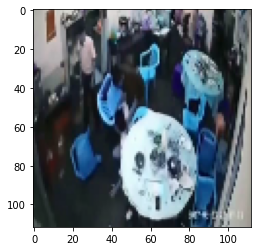

In [ ]:
import matplotlib.pyplot as plt

img = x_Fight[69,12,:,:,:]

plt.imshow(img)

In [ ]:
# to check concatenation is done properly

print(x_train_NonFight[0,0,:,:,:] == x_train[800,0,:,:,:])
print(x_val_NonFight[0,0,:,:,:] == x_val[200,0,:,:,:])



[[[ True  True  True]
  [ True  True  True]
  [ True  True  True]
  ...
  [ True  True  True]
  [ True  True  True]
  [ True  True  True]]

 [[ True  True  True]
  [ True  True  True]
  [ True  True  True]
  ...
  [ True  True  True]
  [ True  True  True]
  [ True  True  True]]

 [[ True  True  True]
  [ True  True  True]
  [ True  True  True]
  ...
  [ True  True  True]
  [ True  True  True]
  [ True  True  True]]

 ...

 [[ True  True  True]
  [ True  True  True]
  [ True  True  True]
  ...
  [ True  True  True]
  [ True  True  True]
  [ True  True  True]]

 [[ True  True  True]
  [ True  True  True]
  [ True  True  True]
  ...
  [ True  True  True]
  [ True  True  True]
  [ True  True  True]]

 [[ True  True  True]
  [ True  True  True]
  [ True  True  True]
  ...
  [ True  True  True]
  [ True  True  True]
  [ True  True  True]]]
[[[ True  True  True]
  [ True  True  True]
  [ True  True  True]
  ...
  [ True  True  True]
  [ True  True  True]
  [ True  True  True]]

 [[ True  True

In [ ]:
# making labels dataset
import numpy as np
from keras.utils import to_categorical

y_train_Fight = np.tile(1,800)
y_train_NonFight = np.tile(0,800)
y_train = np.concatenate((y_train_Fight, y_train_NonFight))

y_val_Fight = np.tile(1,200)
y_val_NonFight = np.tile(0,200)
y_val = np.concatenate((y_val_Fight, y_val_NonFight))

y_dataset = np.concatenate((y_train, y_val))

y_train = to_categorical(y_train)
y_val = to_categorical(y_val)
y_dataset = to_categorical(y_dataset)

print(y_train.shape)
print(y_val.shape)
print(y_dataset.shape)

Using TensorFlow backend.


(1600, 2)
(400, 2)
(2000, 2)


In [ ]:
import random

# val and train Fight data combined is equal to 1000 and same for NonFight
x_train_val_all_indices = [i for i in range(1000)]

x_train_val_indices = random.sample(x_train_val_all_indices, 200)
indices = list( set(x_train_val_all_indices) - set(x_train_val_indices) )
x_test_indices = random.sample(indices, 100)

x_train_indices = random.sample(x_train_val_indices, 160)
x_val_indices = list( set(x_train_val_indices) - set(x_train_indices))


# print(len(set(x_train_val_all_indices)))
# print(len(set(x_train_val_indices)))


def make_numpy_array(x_data, list_indices):
  array = np.zeros((len(list_indices), 16, 112, 112, 3))
  n = 0
  for i in list_indices:
    array[n, :, :, :, :] = x_data[i, :, :, :, :]
    n += 1
  return array

x_train_Fight_160 =  make_numpy_array(x_Fight, x_train_indices)
x_train_NonFight_160 = make_numpy_array(x_NonFight, x_train_indices)

print(x_train_Fight_160.shape)
print(x_train_NonFight_160.shape)

x_test_Fight_100 =  make_numpy_array(x_Fight, x_test_indices)
x_test_NonFight_100 = make_numpy_array(x_NonFight, x_test_indices)

print(x_test_Fight_100.shape)
print(x_test_NonFight_100.shape)

x_Fight_160 =  make_numpy_array(x_Fight, x_train_indices)
x_NonFight_160 = make_numpy_array(x_NonFight, x_train_indices)

x_val_Fight_40 =  make_numpy_array(x_Fight, x_val_indices)
x_val_NonFight_40 = make_numpy_array(x_NonFight, x_val_indices)

print(x_val_Fight_40.shape)
print(x_val_NonFight_40.shape)


(160, 16, 112, 112, 3)
(160, 16, 112, 112, 3)
(100, 16, 112, 112, 3)
(100, 16, 112, 112, 3)
(40, 16, 112, 112, 3)
(40, 16, 112, 112, 3)


In [ ]:
x_train_320 = np.concatenate((x_Fight_160, x_NonFight_160))
x_val_80 = np.concatenate((x_val_Fight_40, x_val_NonFight_40))
x_test_200 = np.concatenate((x_test_Fight_100, x_test_NonFight_100))


print(x_train_320.shape)
print(x_val_80.shape)
print(x_test_200.shape)
print('\n')


y_train_320 = to_categorical(np.concatenate(( np.tile(1,160), np.tile(0,160) )))
y_val_80 = to_categorical(np.concatenate(( np.tile(1,40), np.tile(0,40) )))
y_test_200 = to_categorical(np.concatenate(( np.tile(1,100), np.tile(0,100) )))


print(y_train_320.shape)
print(y_val_80.shape)
print(y_test_200.shape)


In [ ]:
!mkdir "/content/drive/My Drive/all-npy-320-80-200"

In [ ]:
np.save("/content/drive/My Drive/all-npy-320-80-200/x_test_200", x_test_200)

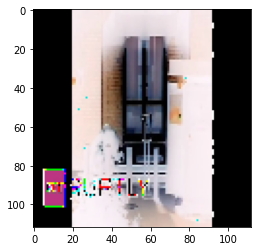

In [ ]:
import matplotlib.pyplot as plt

img = x_train_320[23,1,:,:,:]


plt.imshow((img*255.0).astype(np.uint8))

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
import numpy as np
from keras.utils import to_categorical

y_train_320 = to_categorical(np.concatenate(( np.tile(1,160), np.tile(0,160) )))
y_val_80 = to_categorical(np.concatenate(( np.tile(1,40), np.tile(0,40) )))
y_test_200 = to_categorical(np.concatenate(( np.tile(1,100), np.tile(0,100) )))

print(y_train_320.shape)
print(y_val_80.shape)
print(y_test_200.shape)


Using TensorFlow backend.


(320, 2)
(80, 2)
(200, 2)


In [ ]:
x_test_200 = np.load("/content/drive/My Drive/all-npy-320-80-200/x_test_200.npy")
x_train_320 = np.load("/content/drive/My Drive/all-npy-320-80-200/x_train_320.npy")
x_val_80 = np.load("/content/drive/My Drive/all-npy-320-80-200/x_val_80.npy")


In [ ]:
print(x_train_320.shape)
print(x_val_80.shape)
print(x_test_200.shape)

(320, 16, 112, 112, 3)
(80, 16, 112, 112, 3)
(200, 16, 112, 112, 3)


# 3DCNN

In [ ]:
 
import os

import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from keras.layers import (Activation, Conv3D, Dense, Dropout, Flatten,
                          MaxPooling3D, BatchNormalization)
from keras.layers.advanced_activations import LeakyReLU
from keras.losses import categorical_crossentropy
from keras.models import Sequential
from keras.optimizers import Adam
from keras.utils import np_utils
from keras.utils.vis_utils import plot_model
from sklearn.model_selection import train_test_split


Using TensorFlow backend.


In [ ]:
def define_model():
    model = Sequential()
 
    model.add(Conv3D(64, strides=(1, 1, 1), padding="same", kernel_size=(3, 3, 3), input_shape=(16, 112, 112, 3)))# input_shape=(X.shape[1:])))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
 
    model.add(MaxPooling3D(pool_size=(2, 2, 2), strides=(1, 2, 2), padding="same"))
 
    model.add(Conv3D(128, strides=(1, 1, 1), padding="same", kernel_size=(3, 3, 3)))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
 
    model.add(MaxPooling3D(pool_size=(2, 2, 2), padding="same"))
    model.add(Dropout(0.25))
 
    model.add(Conv3D(256, strides=(1, 1, 1), padding="same", kernel_size=(3, 3, 3)))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
 
    model.add(Conv3D(256, strides=(1, 1, 1), padding="same", kernel_size=(3, 3, 3)))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
 
    model.add(MaxPooling3D( pool_size=(2, 2, 2), padding="same"))
    model.add(Dropout(0.25))
 
    model.add(Conv3D(512, strides=(1, 1, 1), padding="same", kernel_size=(3, 3, 3)))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
 
    model.add(Conv3D(512, strides=(1, 1, 1), padding="same", kernel_size=(3, 3, 3)))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
 
    model.add(MaxPooling3D(pool_size=(2, 2, 2), padding="same"))
    model.add(Dropout(0.25))
 
    model.add(Conv3D(512, strides=(1, 1, 1), padding="same", kernel_size=(3, 3, 3)))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
 
    model.add(Conv3D(512, strides=(1, 1, 1), padding="same", kernel_size=(3, 3, 3)))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
 
    model.add(MaxPooling3D(pool_size=(2, 2, 2), padding="same"))
    model.add(Dropout(0.25))
 
    model.add(Flatten())
 
    model.add(Dense(4096, activation='relu'))
 
    model.add(Dense(4096, activation='relu'))
 
    model.add(BatchNormalization())
    model.add(Dropout(0.5))
 
    model.add(Dense(2, activation='softmax'))
 
    return model
 
model = define_model()
    
model.summary()

model.compile(loss=categorical_crossentropy, optimizer='rmsprop', metrics=['accuracy'])

for i in range(10):
  history = model.fit(x_train_320, y_train_320, validation_data=(x_val_80, y_val_80), batch_size=4, epochs=30, verbose=1, shuffle=True)

  model.save("/content/drive/My Drive/project_models/" + "model_" + str(i) + ".h5")


results = model.evaluate(x_test_200, y_test_200, batch_size=4)
print("test loss, test acc:", results)

In [ ]:


# history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
